In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Reading dataset

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### DataType

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Unique values

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Null Values

In [6]:
pd.isnull(df).sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dropping Columns

In [7]:
df1 = df.drop(columns=['RowNumber','CustomerId',"Surname"])

In [8]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dummies for Gender n Geography

In [9]:
df2 = pd.get_dummies(df1,columns=["Gender","Geography"])

In [10]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


### Plotting Correlation Matrix

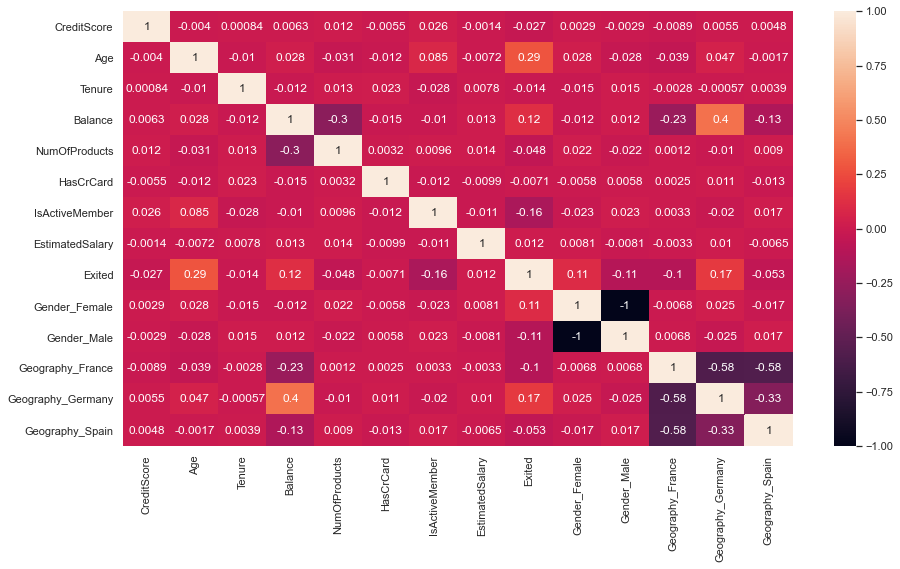

In [11]:
corrMatrix = df2.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Highly Correlated Vars are 
Age,Balance,Gender n Geograpgy

In [12]:
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [13]:
df3 = df2[["Age","Balance",'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain',"Exited"]]

In [14]:
df3.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
exited = df3[df3.Exited==1]
n_exited = df3[df3.Exited==0]

### Dataset is imbalanced
We need to balance the Dataset

### Upsampling

In [16]:
from sklearn.utils import resample
df_upsample = resample(exited,
             replace=True,
             n_samples=len(n_exited),
             random_state=42)

print(df_upsample.shape)

(7963, 8)


In [17]:
df_u = pd.concat([df_upsample,n_exited],ignore_index=True).reset_index(drop=True)

In [18]:
df_u.shape

(15926, 8)

In [19]:
df_u.head()

,Age,Balance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,51,135506.58,0,1,0,0,1,1
1,54,150005.38,1,0,1,0,0,1
2,50,0.00,1,0,1,0,0,1
3,55,111362.76,0,1,0,1,0,1
4,33,153819.58,0,1,1,0,0,1


In [20]:
df_u1 = df_u.sample(frac=1)

In [21]:
df_u1.head(10)

,Age,Balance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
9646,37,69143.91,0,1,1,0,0,0
12351,32,0.00,0,1,1,0,0,0
10549,48,136596.85,0,1,1,0,0,0
3170,29,0.00,0,1,0,0,1,1
2256,37,0.00,1,0,1,0,0,1
9272,31,119825.75,1,0,0,0,1,0
5403,37,90432.92,0,1,0,1,0,1
3233,40,0.00,1,0,0,0,1,1
9127,38,0.00,0,1,0,0,1,0
6433,54,0.00,0,1,1,0,0,1


### Downsampling

In [22]:
from sklearn.utils import resample
df_downsample = resample(n_exited,
             replace=True,
             n_samples=len(exited),
             random_state=42)

print(df_downsample.shape)

(2037, 8)


In [23]:
df_d = pd.concat([df_downsample,exited],ignore_index=True).reset_index(drop=True)

In [24]:
df_d.shape

(4074, 8)

In [25]:
df_d.head()

,Age,Balance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,40,163823.37,0,1,1,0,0,0
1,29,0.00,0,1,1,0,0,0
2,32,0.00,1,0,1,0,0,0
3,34,161572.24,0,1,0,0,1,0
4,24,0.00,0,1,0,0,1,0


In [26]:
df_d = df_d.sample(frac=1)

In [27]:
df_d.head(10)

,Age,Balance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
2301,55,116973.26,1,0,1,0,0,1
2605,30,142910.15,0,1,0,1,0,1
2131,38,130878.75,1,0,0,1,0,1
1845,62,125163.62,1,0,1,0,0,0
2191,36,77253.50,1,0,0,1,0,1
2983,47,0.00,1,0,0,0,1,1
353,44,117028.60,0,1,0,1,0,0
2941,44,108895.93,0,1,0,1,0,1
2927,51,107494.86,1,0,0,1,0,1
1612,34,0.00,1,0,1,0,0,0


# Logistic Regression Upsampling

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [29]:
df_u1.columns

Index(['Age', 'Balance', 'Gender_Female', 'Gender_Male', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Exited'],
      dtype='object')

In [30]:
x = df_u1.drop(columns=["Exited"])
y = df_u1[["Exited"]]

In [31]:
xu_train, xu_test, yu_train, yu_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression()

In [33]:
model.fit(xu_train,yu_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [34]:
predu = model.predict(xu_test)

In [35]:
predu

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = model.score(xu_test, yu_test)
print(model_score)
print(metrics.confusion_matrix(yu_test, predu))
print(metrics.classification_report(yu_test, predu))

0.5125549278091651
[[   0 1553]
 [   0 1633]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1553
           1       0.51      1.00      0.68      1633

    accuracy                           0.51      3186
   macro avg       0.26      0.50      0.34      3186
weighted avg       0.26      0.51      0.35      3186



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.feature_selection import RFECV

In [38]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy',n_jobs= 4)
rfecv.fit(xu_train,yu_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(xu_train.columns[rfecv.support_]))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Optimal number of features: 1
Selected features: ['Balance']


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


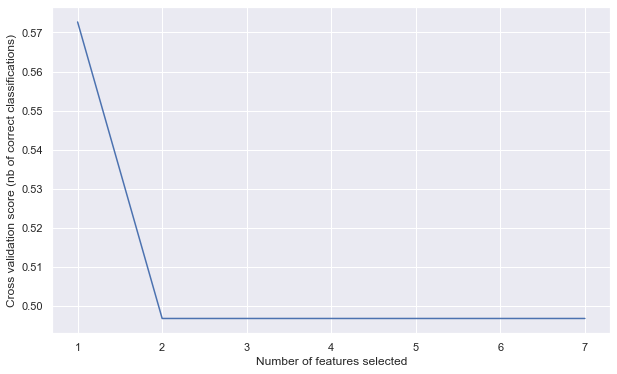

In [39]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [41]:
yu_predu_proba = model.predict_proba(xu_test)[:, 1]
[fpr, tpr, thr] = roc_curve(yu_test, yu_predu_proba)

In [42]:
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(yu_test, predu))

LogisticRegression accuracy is 0.513


In [43]:
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(yu_test, yu_predu_proba))

LogisticRegression log_loss is 0.687


In [44]:
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

LogisticRegression auc is 0.611


In [45]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = model.score(xu_test, yu_test)
print(model_score)

0.5125549278091651


In [46]:
print(metrics.confusion_matrix(yu_test, predu))
print(metrics.classification_report(yu_test, predu))

[[   0 1553]
 [   0 1633]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1553
           1       0.51      1.00      0.68      1633

    accuracy                           0.51      3186
   macro avg       0.26      0.50      0.34      3186
weighted avg       0.26      0.51      0.35      3186



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Selected Var

In [47]:
xu_train1 = xu_train[["Balance"]]
xu_test1 = xu_test[["Balance"]]

In [48]:
model = LogisticRegression()

In [49]:
model.fit(xu_train1,yu_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [50]:
predu = model.predict(xu_test1)

In [51]:
predu

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [52]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = model.score(xu_test1, yu_test)
print(model_score)
print(metrics.confusion_matrix(yu_test, predu))
print(metrics.classification_report(yu_test, predu))

0.5784682988072819
[[ 576  977]
 [ 366 1267]]
              precision    recall  f1-score   support

           0       0.61      0.37      0.46      1553
           1       0.56      0.78      0.65      1633

    accuracy                           0.58      3186
   macro avg       0.59      0.57      0.56      3186
weighted avg       0.59      0.58      0.56      3186



### Logistic Regression Downsampling

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [54]:
df_d.columns

Index(['Age', 'Balance', 'Gender_Female', 'Gender_Male', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Exited'],
      dtype='object')

In [55]:
x = df_d.drop(columns=["Exited"])
y = df_d[["Exited"]]

In [56]:
xd_train, xd_test, yd_train, yd_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
model = LogisticRegression()

In [58]:
model.fit(xd_train,yd_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [59]:
pred = model.predict(xd_test)

In [60]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [61]:
from sklearn.feature_selection import RFECV

In [62]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy',n_jobs= 4)
rfecv.fit(xd_train,yd_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(xd_train.columns[rfecv.support_]))

Optimal number of features: 1
Selected features: ['Balance']


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

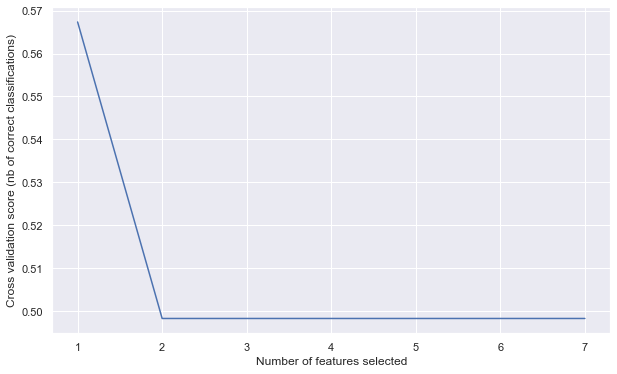

In [63]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [64]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [65]:
y_pred_proba = model.predict_proba(xd_test)[:, 1]
[fpr, tpr, thr] = roc_curve(yd_test, y_pred_proba)

In [66]:
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(yd_test, pred))

LogisticRegression accuracy is 0.507


In [67]:
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(yd_test, y_pred_proba))

LogisticRegression log_loss is 0.687


In [68]:
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

LogisticRegression auc is 0.608


In [69]:
model_score = model.score(xd_test, yd_test)
print(model_score)
print(metrics.confusion_matrix(yd_test, pred))
print(metrics.classification_report(yd_test, pred))

0.5067484662576687
[[  0 402]
 [  0 413]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       402
           1       0.51      1.00      0.67       413

    accuracy                           0.51       815
   macro avg       0.25      0.50      0.34       815
weighted avg       0.26      0.51      0.34       815



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Selected Var

In [70]:
xd_train1 = xd_train[["Balance"]]
xd_test1 = xd_test[["Balance"]]

In [71]:
model = LogisticRegression()

In [72]:
model.fit(xd_train1,yd_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [73]:
predu = model.predict(xd_test1)

In [74]:
predu

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [75]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = model.score(xd_test1, yd_test)
print(model_score)
print(metrics.confusion_matrix(yd_test, predu))
print(metrics.classification_report(yd_test, predu))

0.5865030674846625
[[163 239]
 [ 98 315]]
              precision    recall  f1-score   support

           0       0.62      0.41      0.49       402
           1       0.57      0.76      0.65       413

    accuracy                           0.59       815
   macro avg       0.60      0.58      0.57       815
weighted avg       0.60      0.59      0.57       815



### Random Forest Algorithm UPS

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000, n_jobs=4)
clf.fit(xu_train,yu_train)
y_predr1=clf.predict(xu_test)

<ipython-input-76-e2788d83c9ab>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xu_train,yu_train)


In [77]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yu_test, y_predr1))

Accuracy: 0.8531073446327684


In [78]:
clf1=RandomForestClassifier(n_estimators=1000, n_jobs=4)
clf1.fit(xu_train,yu_train)
y_predr2=clf1.predict(xu_test)

<ipython-input-78-16b01be56602>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(xu_train,yu_train)


In [79]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yu_test, y_predr2))

Accuracy: 0.854676710608914


Feature: 0, Score: 0.39644
Feature: 1, Score: 0.53914
Feature: 2, Score: 0.00921
Feature: 3, Score: 0.00949
Feature: 4, Score: 0.00861
Feature: 5, Score: 0.03138
Feature: 6, Score: 0.00574


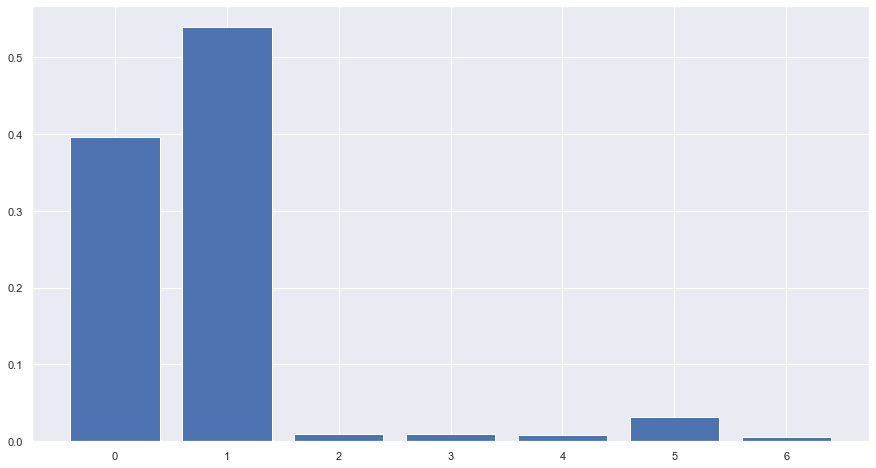

In [80]:
importance = clf1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


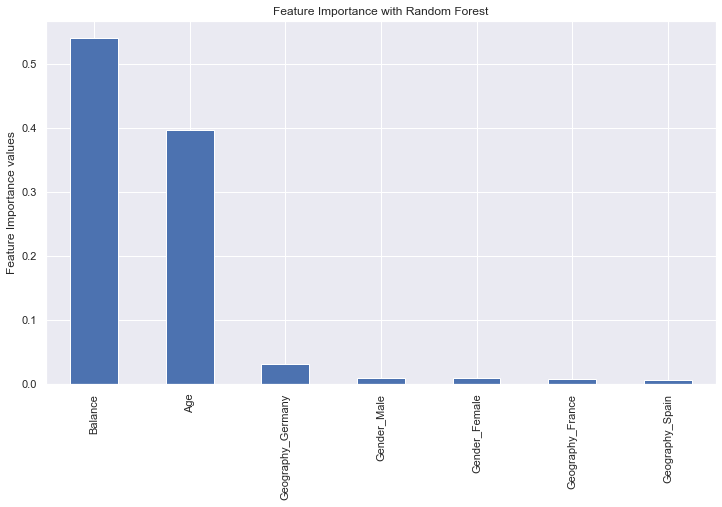

In [81]:
import numpy as np
# Plot the top 40 important features
imp_feat_rf = pd.Series(clf1.feature_importances_, index=xu_train.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

# Save indexes of the important features in descending order of their importance
indices = np.argsort(clf1.feature_importances_)[::-1]

In [82]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = clf.score(xu_test, yu_test)
print(model_score)
print(metrics.confusion_matrix(yu_test, y_predr1))
print(metrics.classification_report(yu_test, y_predr1))

0.8531073446327684
[[1250  303]
 [ 165 1468]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1553
           1       0.83      0.90      0.86      1633

    accuracy                           0.85      3186
   macro avg       0.86      0.85      0.85      3186
weighted avg       0.86      0.85      0.85      3186



### Random Forest Algorithm DWS

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000, n_jobs=4)
clf.fit(xd_train,yd_train)
y_predr1=clf.predict(xd_test)

<ipython-input-83-8a6ab504a7d9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xd_train,yd_train)


In [84]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yd_test, y_predr1))

Accuracy: 0.6613496932515337


In [85]:
clf1=RandomForestClassifier(n_estimators=1000, n_jobs=4)
clf1.fit(xd_train,yd_train)
y_predr2=clf1.predict(xd_test)

<ipython-input-85-002e5133c642>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(xd_train,yd_train)


In [86]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yd_test, y_predr2))

Accuracy: 0.6613496932515337


Feature: 0, Score: 0.45019
Feature: 1, Score: 0.48827
Feature: 2, Score: 0.01019
Feature: 3, Score: 0.00977
Feature: 4, Score: 0.01155
Feature: 5, Score: 0.02409
Feature: 6, Score: 0.00593


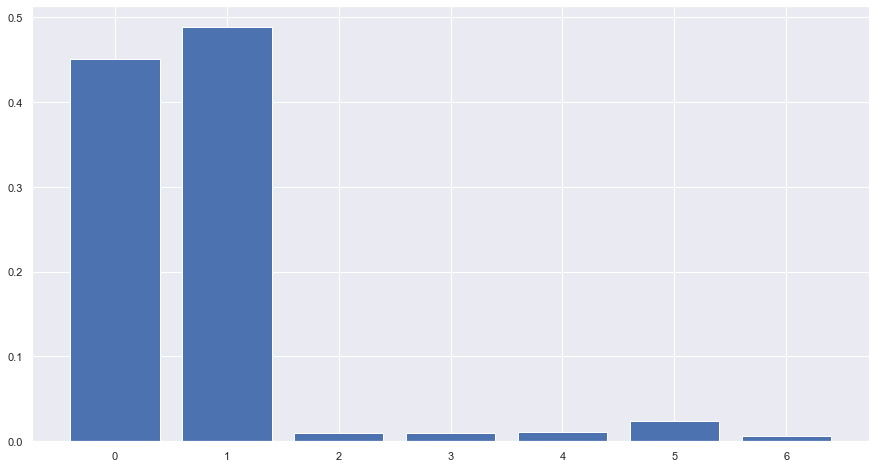

In [87]:
importance = clf1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


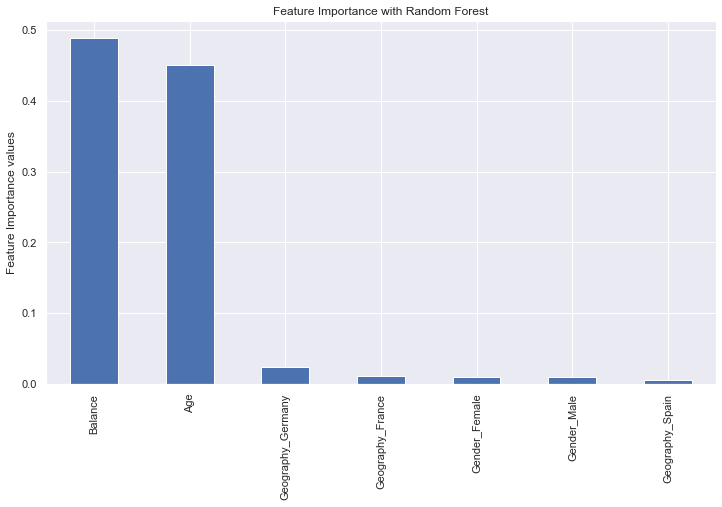

In [88]:
import numpy as np
# Plot the top 40 important features
imp_feat_rf = pd.Series(clf1.feature_importances_, index=xd_train.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

# Save indexes of the important features in descending order of their importance
indices = np.argsort(clf1.feature_importances_)[::-1]

In [89]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = clf.score(xd_test, yd_test)
print(model_score)
print(metrics.confusion_matrix(yd_test, y_predr1))
print(metrics.classification_report(yd_test, y_predr1))

0.6613496932515337
[[283 119]
 [157 256]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       402
           1       0.68      0.62      0.65       413

    accuracy                           0.66       815
   macro avg       0.66      0.66      0.66       815
weighted avg       0.66      0.66      0.66       815



### XGBoost ups

In [90]:
from xgboost import XGBClassifier
xgb_cv = XGBClassifier(n_estimators=100)


In [91]:
xgb_cv.fit(xu_train,yu_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
predictions = xgb_cv.predict(xu_test)
print(metrics.accuracy_score(predictions,yu_test))

0.7981795354676711


In [93]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = xgb_cv.score(xu_test, yu_test)
print(model_score)
print(metrics.confusion_matrix(yu_test, predictions))
print(metrics.classification_report(yu_test, predictions))

0.7981795354676711
[[1206  347]
 [ 296 1337]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1553
           1       0.79      0.82      0.81      1633

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



### XGBoost dws

In [94]:
from xgboost import XGBClassifier
xgb_cv = XGBClassifier(n_estimators=100)


In [95]:
xgb_cv.fit(xd_train,yd_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
predictions = xgb_cv.predict(xd_test)
print(metrics.accuracy_score(predictions,yd_test))

0.6846625766871166


In [97]:
from sklearn import metrics
from sklearn.metrics import recall_score
model_score = xgb_cv.score(xd_test, yd_test)
print(model_score)
print(metrics.confusion_matrix(yd_test, predictions))
print(metrics.classification_report(yd_test, predictions))

0.6846625766871166
[[283 119]
 [138 275]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       402
           1       0.70      0.67      0.68       413

    accuracy                           0.68       815
   macro avg       0.69      0.68      0.68       815
weighted avg       0.69      0.68      0.68       815



In [100]:
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(xd_test,yd_test)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.5312883435582823


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [101]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(xd_test,yd_test)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4}
Best score is 0.7153374233128835


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.6404908  0.70306748        nan 0.62208589 0.68588957 0.64539877
 0.71288344 0.63435583 0.6208589  0.71533742]
  warnings.warn(
